In [41]:
# Basic modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import matplotlib.image as mpimg
from PIL import Image

from sklearn.metrics import confusion_matrix

# Modeling modules
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping


In [7]:
# Generate image class names based on directory's name.
labels = sorted(os.listdir('plant_images'))
print(labels)

['.DS_Store', 'Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Tomato___Bacterial_spot', 'Tomato___Late_blight', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus']


In [8]:
# create function to view random image
def view_random_image(target_dir, target_class):
    target_folder = target_dir + target_class
    random_image = random.sample(os.listdir(target_folder), 1)
    img = mpimg.imread(target_folder+ "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_folder)
    plt.axis('off')
    print(f"Image shape: {img.shape}")
    return img

Image shape: (256, 256, 3)


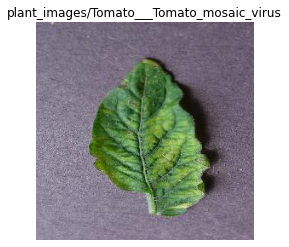

In [9]:
# view random image
img = view_random_image(target_dir= 'plant_images/', target_class='Tomato___Tomato_mosaic_virus')

In [10]:
# preprocess data 
train_dir = 'plant_images'
datagen = ImageDataGenerator(rescale = 1.0 / 255.0, validation_split=0.2)

# Set train data 
train_data = datagen.flow_from_directory(
    train_dir, batch_size =32, target_size = (256,256), class_mode = 'categorical', subset='training'
)

# Set validation data
valid_data = datagen.flow_from_directory(
    train_dir, batch_size =32, target_size = (256,256), class_mode = 'categorical', subset='validation'
)


Found 12739 images belonging to 19 classes.
Found 3176 images belonging to 19 classes.


In [11]:
# Create model architecture with Sequential API
model = Sequential()
model.add(Conv2D(16,3, activation = 'relu', input_shape = (256,256,3)))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(32,3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(64, 3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Conv2D(128, 3, activation = 'relu'))
model.add(Dropout(0.2))
model.add(MaxPool2D(2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(19, activation='softmax'))

2021-12-23 12:15:36.838668: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-12-23 12:15:36.839560: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


In [15]:
# Compile data and set configuration for model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
# Create early stop callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=2)

In [17]:
# Train data 
history = model.fit(train_data, epochs=3, validation_data = valid_data, callbacks=[early_stop])

2021-12-22 23:02:13.521775: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 150 of 399
2021-12-22 23:02:23.578255: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 288 of 399
2021-12-22 23:02:31.976555: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


Train for 399 steps, validate for 100 steps
Epoch 1/10


2021-12-22 23:02:43.291882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 240 of 399
2021-12-22 23:02:50.839633: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2624s 7s/step - loss: 1.8366 - accuracy: 0.4294 - val_loss: 1.3033 - val_accuracy: 0.6889
Epoch 2/10


2021-12-22 23:46:26.668500: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 243 of 399
2021-12-22 23:46:33.787092: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 21700s 54s/step - loss: 0.8426 - accuracy: 0.7232 - val_loss: 0.9168 - val_accuracy: 0.7739
Epoch 3/10


2021-12-23 05:48:06.610417: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 238 of 399
2021-12-23 05:48:14.011212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2052s 5s/step - loss: 0.5662 - accuracy: 0.8067 - val_loss: 0.6319 - val_accuracy: 0.8076
Epoch 4/10


2021-12-23 06:22:18.202878: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 255 of 399
2021-12-23 06:22:24.805302: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2173s 5s/step - loss: 0.4259 - accuracy: 0.8489 - val_loss: 0.5751 - val_accuracy: 0.8186
Epoch 5/10


2021-12-23 06:58:30.736662: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 260 of 399
2021-12-23 06:58:37.095561: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2238s 6s/step - loss: 0.3468 - accuracy: 0.8759 - val_loss: 0.4649 - val_accuracy: 0.8523
Epoch 6/10


2021-12-23 07:35:49.000777: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 261 of 399
2021-12-23 07:35:55.308704: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2261s 6s/step - loss: 0.2787 - accuracy: 0.9002 - val_loss: 0.4231 - val_accuracy: 0.8561
Epoch 7/10


2021-12-23 08:13:29.546080: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 257 of 399
2021-12-23 08:13:36.041948: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2275s 6s/step - loss: 0.2317 - accuracy: 0.9184 - val_loss: 0.3878 - val_accuracy: 0.8756
Epoch 8/10


2021-12-23 08:51:24.417149: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 255 of 399
2021-12-23 08:51:31.798447: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2303s 6s/step - loss: 0.2063 - accuracy: 0.9286 - val_loss: 0.3563 - val_accuracy: 0.8797
Epoch 9/10


2021-12-23 09:29:47.500053: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 256 of 399
2021-12-23 09:29:54.527545: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 2749s 7s/step - loss: 0.1834 - accuracy: 0.9388 - val_loss: 0.3926 - val_accuracy: 0.8621
Epoch 10/10


2021-12-23 10:15:36.465025: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:143] Filling up shuffle buffer (this may take a while): 234 of 399
2021-12-23 10:15:44.086204: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:193] Shuffle buffer filled.


399/399 [==============================] - 3079s 8s/step - loss: 0.1618 - accuracy: 0.9427 - val_loss: 0.4250 - val_accuracy: 0.8643


In [21]:
# Create function plotting for model tracking
def plot_model_eval(data):
    pd.DataFrame(data.history).plot(figsize=(8,5))
    plt.grid(True)
    plt.gca().set_ylim(0,1)
    plt.show()

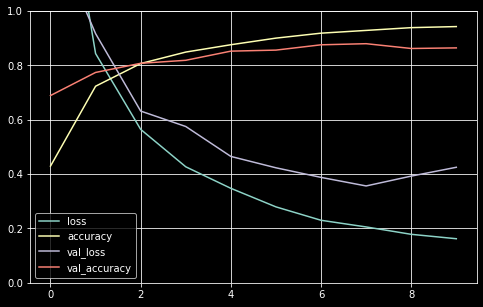

In [23]:
plot_model_eval(history)

Image shape: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=256x256 at 0x7FCAC9EE7610>


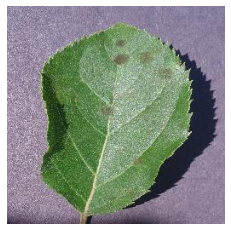

In [37]:
# Get new image 
new_img = Image.open('plant_images/Apple___Apple_scab/0a769a71-052a-4f19-a4d8-b0f0cb75541c___FREC_Scab 3165.JPG')
plt.imshow(new_img)
plt.axis(False);
print(f"Image shape: {new_img}")

In [38]:
val = np.expand_dims(new_img, axis=0)
val.shape

(1, 256, 256, 3)

In [39]:
# Predict new image 
pred = model.predict(val)
pred.argmax()

14

In [31]:
# Get class names with indices 
train_data.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 4,
 'Corn_(maize)___Common_rust_': 5,
 'Corn_(maize)___Northern_Leaf_Blight': 6,
 'Corn_(maize)___healthy': 7,
 'Grape___Black_rot': 8,
 'Grape___Esca_(Black_Measles)': 9,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 10,
 'Grape___healthy': 11,
 'Potato___Early_blight': 12,
 'Potato___Late_blight': 13,
 'Tomato___Bacterial_spot': 14,
 'Tomato___Late_blight': 15,
 'Tomato___Septoria_leaf_spot': 16,
 'Tomato___Target_Spot': 17,
 'Tomato___Tomato_mosaic_virus': 18}